# Compare models with each other

In [1]:
import os
if 'notebooks' in os.getcwd(): os.chdir('../..')  # change to main directory
print('Working directory:', os.getcwd() )

Working directory: /scratch/snx3000/bp000429/neurips_presentation/adrian_sensorium


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sci
import pandas as pd
import seaborn as sns

import os, glob

### Read results from DataFrame

In [3]:
res_folder = 'saved_models/00_csv_results/'
# files = sorted( glob.glob( res_folder + 'config_*.csv')) 
files = sorted( glob.glob( res_folder + 'only_[abghn]*.csv')) 

# add only merged ensemble models
files.append('saved_models/00_csv_results/only_ensemble_merged.csv')  
files.append('saved_models/00_csv_results/config_m4_merged.csv')  

df_list = list()
for file in files:
    df_list.append( pd.read_csv(file, index_col=0) )

df = pd.concat( df_list, ignore_index=True )
df

,model,key,neuron,split,cor
0,only_adjNorm,27204-5-13,0,Train,0.553005
1,only_adjNorm,27204-5-13,0,Val,0.532006
2,only_adjNorm,27204-5-13,0,Test,0.000000
3,only_adjNorm,27204-5-13,1,Train,0.569313
4,only_adjNorm,27204-5-13,1,Val,0.458876
...,...,...,...,...,...
1123027,config_m4_merged,21067-10-18,8370,Val,0.506491
1123028,config_m4_merged,21067-10-18,8370,Test,0.493986
1123029,config_m4_merged,21067-10-18,8371,Train,0.414163
1123030,config_m4_merged,21067-10-18,8371,Val,0.508466


In [9]:
set(df['key'])

{'21067-10-18',
 '22846-10-16',
 '23343-5-17',
 '23656-14-22',
 '23964-4-22',
 '27204-5-13'}

In [4]:
%matplotlib inline

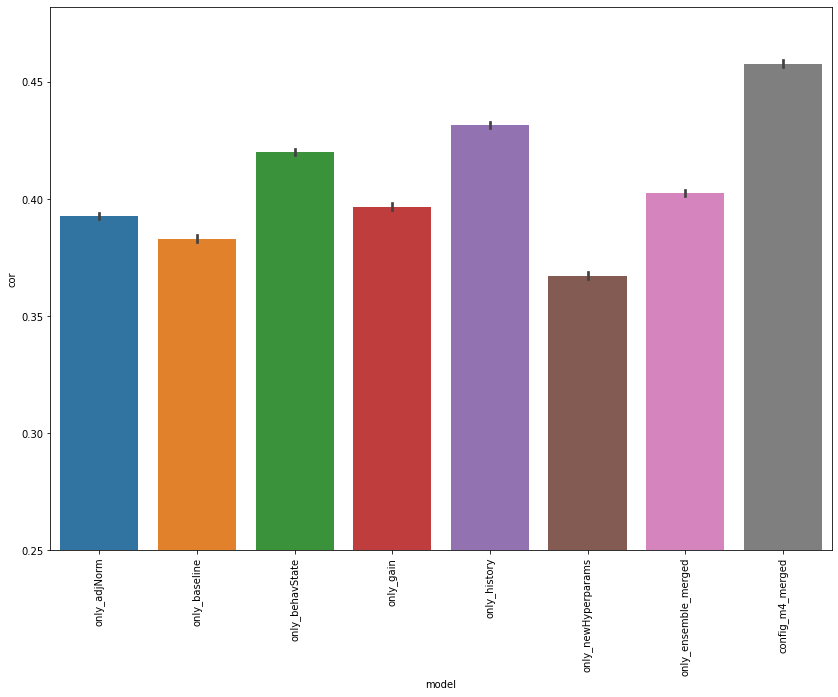

In [12]:
plt.figure(figsize=(14,10))
sns.barplot(data=df[ (df['split']=='Test') & (df['key'] != '27204-5-13')], x='model', y='cor')  # , hue='model'
plt.ylim(bottom=0.25)
_ = plt.xticks(rotation=90)

In [6]:
df[ df['split']=='Val'].groupby('model')['cor'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
config_m4_merged,46793.0,0.546122,0.127094,0.026225,0.459473,0.550276,0.638558,0.920893
only_adjNorm,46793.0,0.414543,0.138016,-0.022884,0.316241,0.412963,0.509435,0.863735
only_baseline,46793.0,0.408000,0.137603,-0.014985,0.310358,0.406600,0.502152,0.850419
only_behavState,46793.0,0.438850,0.136564,-0.006572,0.343154,0.439391,0.533091,0.870037
only_ensemble_merged,46793.0,0.473103,0.126373,0.042940,0.385058,0.472835,0.560382,0.891501
only_gain,46793.0,0.418852,0.143315,-0.044207,0.317158,0.416486,0.519497,0.882282
only_history,46793.0,0.447425,0.133860,-0.115740,0.354297,0.448357,0.540810,0.864521
only_newHyperparams,46793.0,0.392884,0.140965,-0.030054,0.291964,0.389968,0.490875,0.851008


In [13]:
df[ (df['split']=='Test') & (df['key'] != '27204-5-13')].groupby('model')['cor'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
config_m4_merged,39255.0,0.457766,0.134861,-0.002917,0.363021,0.454342,0.550771,0.900067
only_adjNorm,39255.0,0.392626,0.139681,0.005808,0.291701,0.385068,0.485551,0.901787
only_baseline,39255.0,0.383080,0.139293,-0.012462,0.281915,0.375837,0.476174,0.908371
only_behavState,39255.0,0.420273,0.137844,0.014516,0.321747,0.416487,0.514504,0.907202
only_ensemble_merged,39255.0,0.402697,0.135467,0.000153,0.305315,0.395870,0.493724,0.908782
only_gain,39255.0,0.396737,0.144113,0.004965,0.291306,0.389978,0.495575,0.917411
only_history,39255.0,0.431495,0.132811,-0.097918,0.336654,0.428712,0.522020,0.893122
only_newHyperparams,39255.0,0.367241,0.141076,-0.013166,0.263624,0.358854,0.461417,0.876362


### Check predictions of model

In [7]:
model_name = 'only_baseline'
path = os.path.join('saved_models', model_name, model_name+'.npy')

all_data = np.load( path, allow_pickle=True).item()

In [8]:
all_data.keys()

dict_keys(['27204-5-13', '23343-5-17', '23964-4-22', '23656-14-22', '22846-10-16', '21067-10-18'])

In [9]:
session = all_data['21067-10-18']
session.keys()

dict_keys(['target', 'output', 'trial_type', 'trial_id', 'pupil', 'pupil_dt', 'running', 'center'])

In [10]:
session['target'].shape

(5994, 8372)

In [11]:
session['pupil'].shape

(5994, 1)

(1000.0, 2000.0)

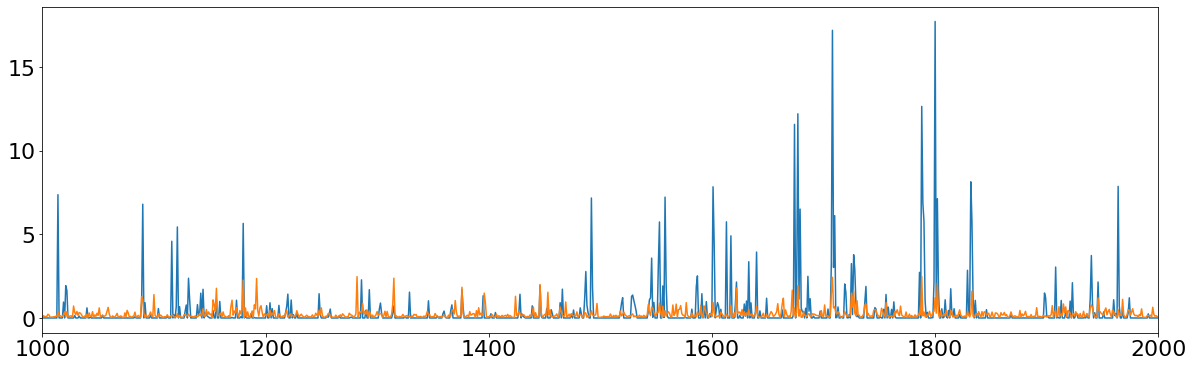

In [42]:
neuron = 1234
trace = session['target'][:,neuron]
pred = session['output'][:,neuron]

plt.figure(figsize=(20,6))
plt.plot(trace)
plt.plot(pred)
plt.xlim(1000,2000)

In [13]:
target_mat = session['target'].T   # (nr_neurons, nr_trials)



In [14]:
# !pip install --upgrade numba

In [15]:
from rastermap.mapping import Rastermap

In [16]:
model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

In [17]:
model.fit(target_mat)

nmin 200
0.21312785148620605
5.084686279296875
5.218530178070068
5.265381097793579
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
1.74s     0        0.0180      2
1.93s    10        0.0906      4
2.09s    20        0.1175      8
2.25s    30        0.1556      18
2.42s    40        0.1816      28
2.59s    50        0.1829      28
2.75s   final      0.1831
2.76s upsampled    0.1831


In [26]:
matplotlib.rcParams.update({'font.size': 22})

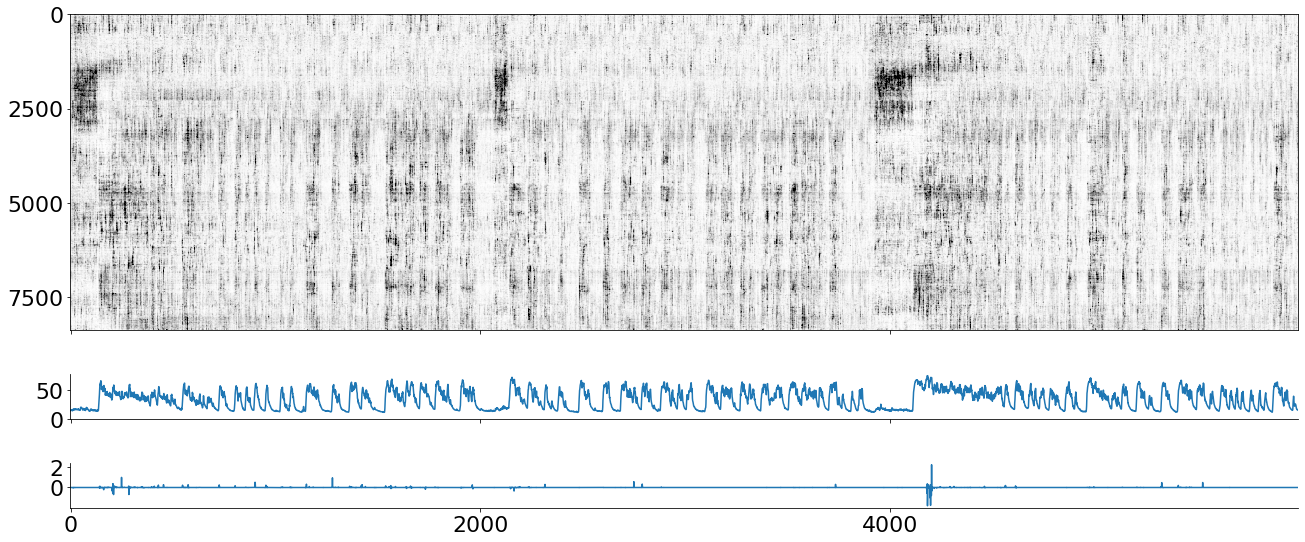

In [43]:
sorting = model.isort

f, (ax_0, ax_1, ax_2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [7, 1, 1]},
                                    figsize=(18,8), sharex=True)
plt.sca(ax_0)
plt.imshow(target_mat[model.isort, :], cmap='Greys', vmin=0, vmax=1.5)
plt.tight_layout()
plt.axis('auto')
# plt.ylabel('Neurons')

ax_1.plot( session['pupil'] )
ax_1.set_yticks([0,50])
ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
# ax_1.set_ylabel('Pupil')

ax_2.plot( session['running'] )
ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)
# ax_2.set_ylabel('Running')
# ax_2.set_xlabel('Shown images')

plt.locator_params(nbins=4)

In [21]:
len(sorting)

8372

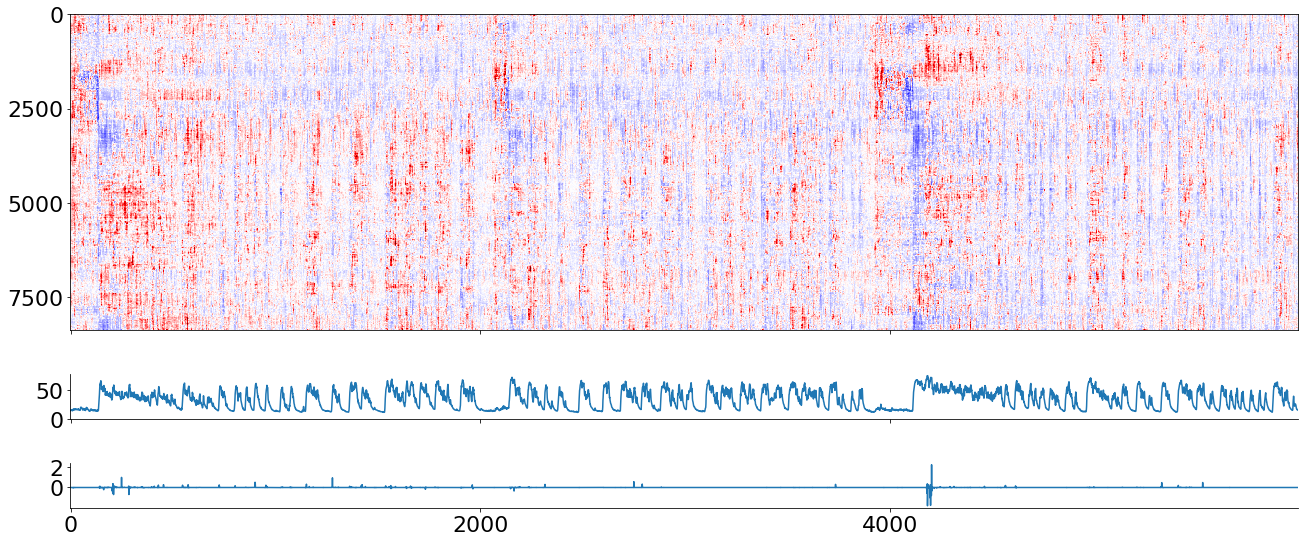

In [44]:
# residuals

tar = target_mat[model.isort, :]
pred = session['output'].T[model.isort, :]

f, (ax_0, ax_1, ax_2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [7, 1, 1]},
                                    figsize=(18,8), sharex=True)
plt.sca(ax_0)
plt.imshow(tar-pred, cmap='seismic', vmin=-1.5, vmax=1.5)
plt.tight_layout()
plt.axis('auto')


ax_1.plot( session['pupil'] )
ax_1.set_yticks([0,50])
ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)

ax_2.plot( session['running'] )
ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)

plt.locator_params(nbins=4)
# plt.xlim(1500,2500)

In [23]:
tar.shape

(8372, 5994)

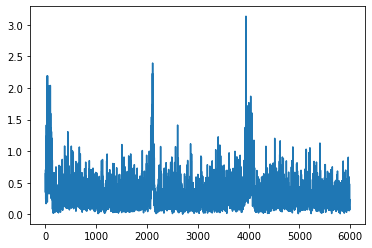

In [44]:
ns = model.isort[1900:2100]

m = np.mean(target_mat[ns,:], axis=0)
plt.figure()
plt.plot(m)


### Comparison bar plot

([<matplotlib.axis.YTick at 0x1554ace7f340>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

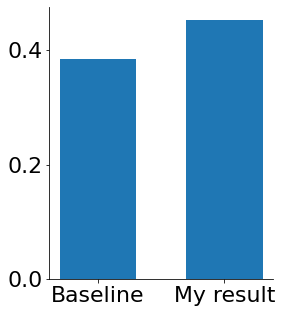

In [23]:
baseline = 0.384
submission = 0.453

plt.figure(figsize=(4,5))
matplotlib.rcParams.update({'font.size': 22})

plt.bar([1,2], [baseline, submission], width=0.6)
plt.xticks([1,2], ['Baseline', 'My result'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([0,0.2,0.4])